In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/test/'

filtFile = '001.nc_0080_Filtered.nc'
NLFile ='001_NLmodelEP_80km.nc'
unfiltFile = '1.nc'

ds1 = Dataset(fldLoc + filtFile)
ds2 = Dataset(fldLoc + NLFile)
ds3 = Dataset(fldLoc + unfiltFile)

print(ds1.variables.keys())
print(ds2.variables.keys())
print(ds3.variables.keys())

dict_keys(['EddyPower', 'EddyPowerPerArea', 'MeanPower', 'MeanPowerPerArea', 'SUF', 'SVF', 'TotalPower', 'TotalPowerPerArea', 'UVEL', 'VVEL', 'time'])
dict_keys(['time', 'NLmodel_EPCg', 'NLmodel_EPCg_rot', 'NLmodel_EPCg_strain', 'ell'])
dict_keys(['UGOS', 'VGOS', 'time', 'TAUX', 'TAUY'])


In [3]:
EPPA = np.array(ds1.variables['EddyPowerPerArea'][0,:,:])
NLM_tot = np.array(ds2.variables['NLmodel_EPCg'][0,:,:])
NLM_rot = np.array(ds2.variables['NLmodel_EPCg_rot'][0,:,:])
NLM_str = np.array(ds2.variables['NLmodel_EPCg_strain'][0,:,:])
UVEL = np.array(ds3.variables['UGOS'][0,:,:])
VVEL = np.array(ds3.variables['VGOS'][0,:,:])

2.57162274731503e-07


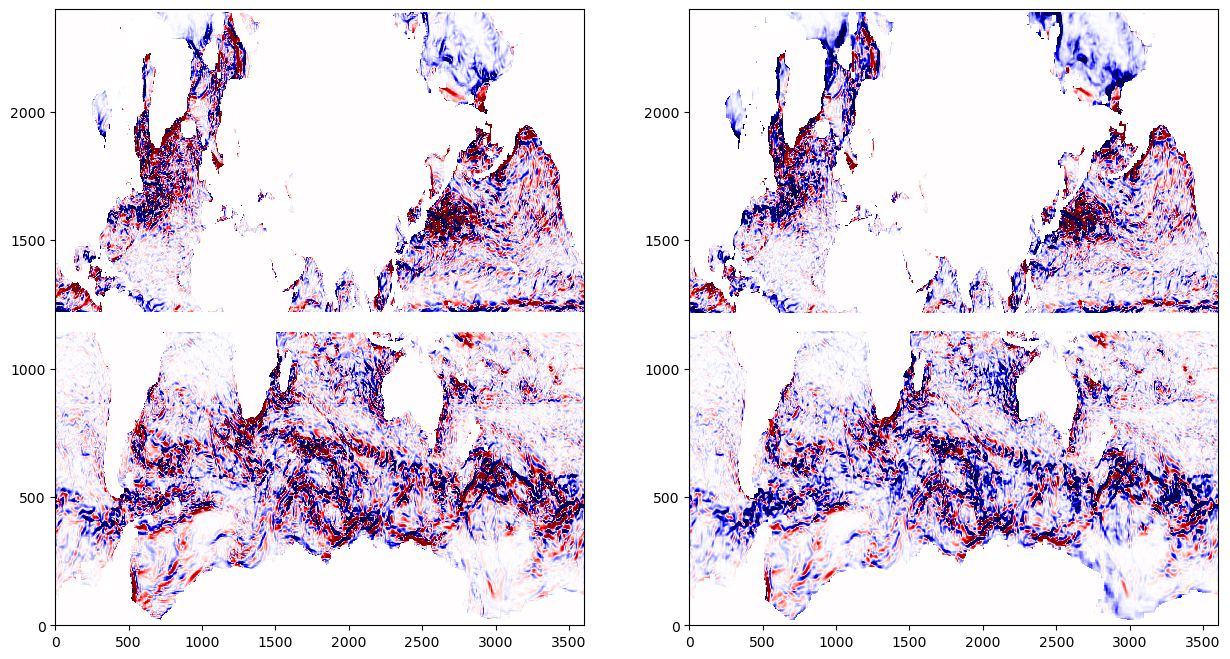

In [4]:
x = EPPA.flatten()
y = NLM_tot.flatten()
msk = np.isnan(x) + np.isnan(y)
r = np.corrcoef(x[~msk], y[~msk])[0, 1]
print(r)

plt.figure(figsize=(15,8))


d = 4
plt.subplot(1,2,1)
plt.pcolormesh(NLM_tot, vmin=-d, vmax=d, cmap='seismic')

d = 4
plt.subplot(1,2,2)
plt.pcolormesh(EPPA, vmin=-d, vmax=d, cmap='seismic')

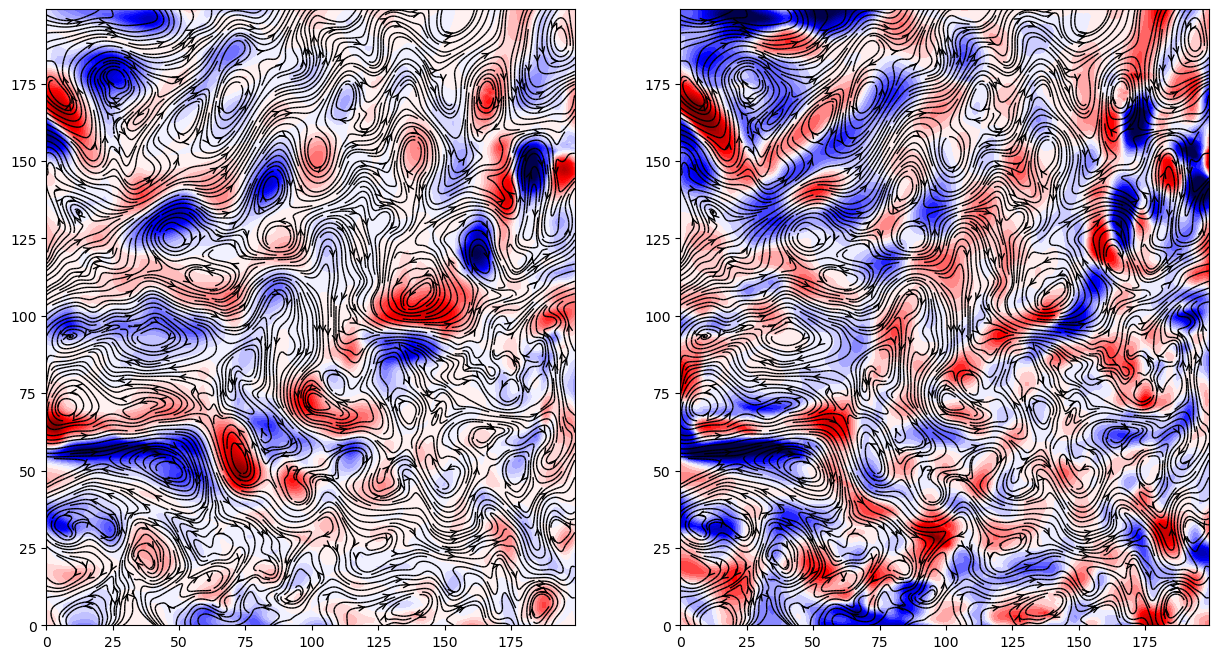

In [5]:
plt.figure(figsize=(15,8))

s1 = 1500
s2 = 3000
num1 = 200
num2 = 200

X = np.arange(num2)
Y = np.arange(num1)

U = UVEL[s1:s1+num1,s2:s2+num2].copy()
V = VVEL[s1:s1+num1,s2:s2+num2].copy()

d = 6
plt.subplot(1,2,1)
plt.contourf(NLM_rot[s1:s1+num1,s2:s2+num2],levels = 50, vmin=-d, vmax=d, cmap='seismic')
plt.streamplot(X, Y, U, V, color='k', density= 6, linewidth=1, arrowstyle = '->',arrowsize = 1)

d = 3
plt.subplot(1,2,2)
plt.contourf(NLM_str[s1:s1+num1,s2:s2+num2],levels = 50, vmin=-d, vmax=d, cmap='seismic')
plt.streamplot(X, Y, U, V, color='k', density= 6, linewidth=1, arrowstyle = '->',arrowsize = 1)

In [6]:
x = NLM_tot[s1:s1+num1,s2:s2+num2].flatten()
y = EPPA[s1:s1+num1,s2:s2+num2].flatten()
r = np.corrcoef(x[~np.isnan(x)], y[~np.isnan(y)])[0, 1]

In [7]:
r

0.9119346481471206

In [8]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/test/'

ds_a = Dataset(fldLoc + "timeSpaceFlattenCorr.nc")


regions = np.array(ds_a.variables['region'])
nregions = len(regions)
ell = np.array(ds_a.variables['ell'])
nell = len(ell)

corr_EPPA_NLMtot = np.array(ds_a.variables['corr_EPPA_NLMtot'][:,:]) # (ell, region)
corr_EPPA_NLMrot = np.array(ds_a.variables['corr_EPPA_NLMrot'][:,:]) # (ell, region)
corr_EPPA_NLMstr = np.array(ds_a.variables['corr_EPPA_NLMstr'][:,:]) # (ell, region)

corr_tAvg_EPPA_NLMtot = np.array(ds_a.variables['corr_tAvg_EPPA_NLMtot'][:,:]) # (ell, region)
corr_tAvg_EPPA_NLMrot = np.array(ds_a.variables['corr_tAvg_EPPA_NLMrot'][:,:]) # (ell, region)
corr_tAvg_EPPA_NLMstr = np.array(ds_a.variables['corr_tAvg_EPPA_NLMstr'][:,:]) # (ell, region)

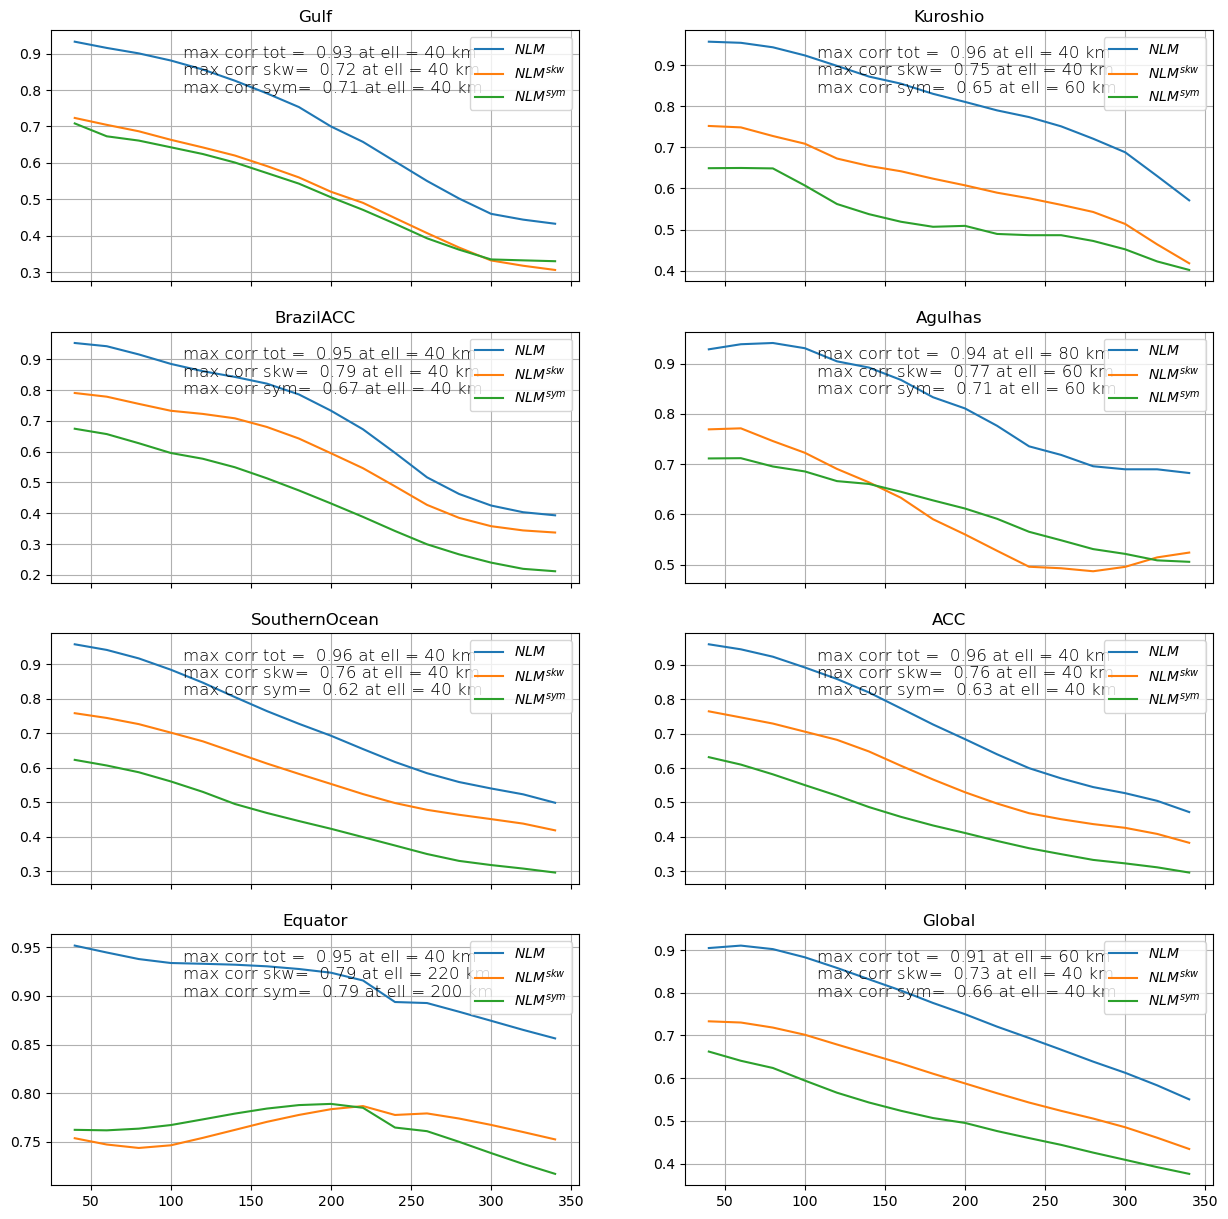

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(15, 15))

for i in range(8):
    ii = i//2
    jj = i%2
    maxCorr = np.max(corr_EPPA_NLMtot[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMtot[:,i])]
    txt = 'max corr tot = {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    
    maxCorr = np.max(corr_EPPA_NLMrot[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMrot[:,i])]
    txt2 = 'max corr skw= {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    
    maxCorr = np.max(corr_EPPA_NLMstr[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMstr[:,i])]
    txt3 = 'max corr sym= {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    
    
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMtot[:,i], label = r'$NLM$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMtot[:,i], label = 'NLM_timeAvg')
    ax[ii,jj].text(0.25, 0.67, txt + txt2 + txt3, horizontalalignment='left', fontweight = 'light', 
                    verticalalignment='bottom', transform=ax[ii,jj].transAxes, fontsize=12)
    ax[ii,jj].grid(visible=None, which='major', axis='both')
    ax[ii,jj].set_title(regions[i])
    
for i in range(8):
    ii = i//2
    jj = i%2
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMrot[:,i], label = r'$NLM^{skw}$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMrot[:,i], label = 'NLM_rot_timeAvg')
    
for i in range(8):
    ii = i//2
    jj = i%2
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMstr[:,i], label = r'$NLM^{sym}$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMstr[:,i], label = 'NLM_str_timeAvg')
    ax[ii,jj].legend()

2.57162274731503e-07


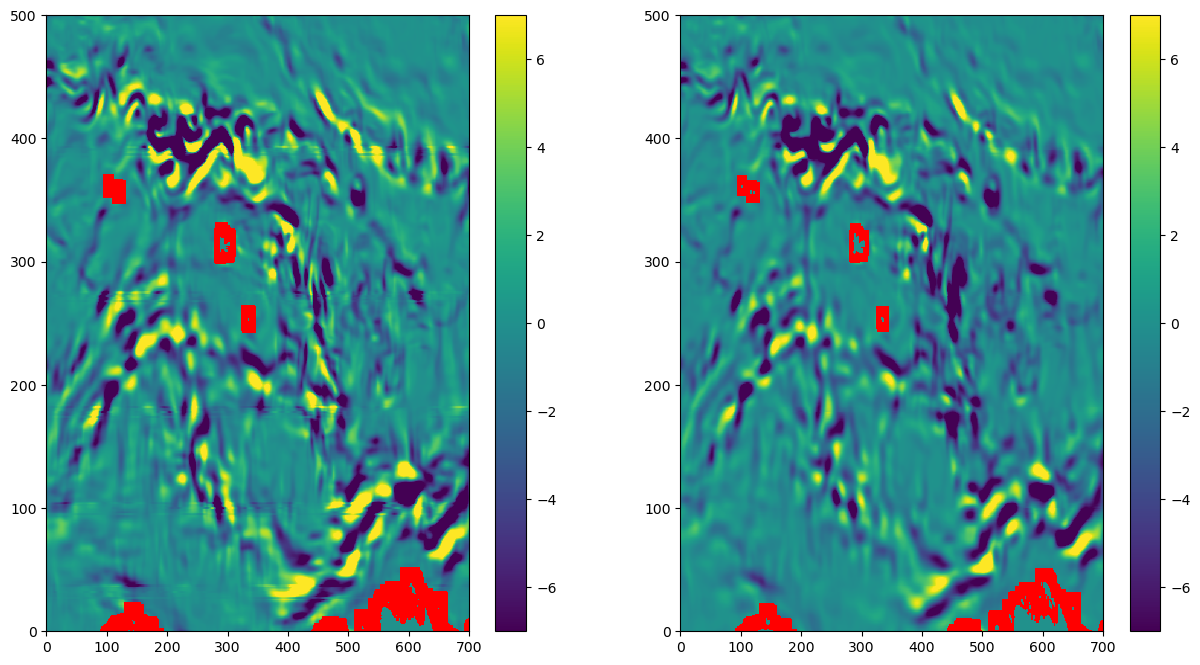

In [10]:
x = EPPA.flatten()
y = NLM_tot.flatten()
msk = np.isnan(x) + np.isnan(y)
r = np.corrcoef(x[~msk], y[~msk])[0, 1]
print(r)

nx = 700
x1 = 1500
x2 = x1 + nx

ny = 500
y1 = 300
y2 = y1 + ny

plt.figure(figsize=(15,8))

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('red')

d = 7
plt.subplot(1,2,1)
plt.pcolormesh(NLM_tot[y1:y2, x1:x2], vmin=-d, vmax=d, cmap=cmap)
plt.colorbar()

d = 7
plt.subplot(1,2,2)
plt.pcolormesh(EPPA[y1:y2, x1:x2], vmin=-d, vmax=d, cmap=cmap)
plt.colorbar()


In [ ]:
plt.figure(figsize=(15,8))

nx = 200
x1 = 1500
x2 = x1 + nx

ny = 200
y1 = 350
y2 = y1 + ny


X = np.arange(nx)
Y = np.arange(ny)

U = UVEL[y1:y2, x1:x2].copy()
V = VVEL[y1:y2, x1:x2].copy()

d = 6
plt.subplot(1,2,1)
plt.contourf(NLM_rot[y1:y2, x1:x2],levels = 50, vmin=-d, vmax=d, cmap='seismic')
plt.streamplot(X, Y, U, V, color='k', density= 6, linewidth=1, arrowstyle = '->',arrowsize = 1)

d = 6
plt.subplot(1,2,2)
plt.contourf(NLM_str[y1:y2, x1:x2],levels = 50, vmin=-d, vmax=d, cmap='seismic')
plt.streamplot(X, Y, U, V, color='k', density= 6, linewidth=1, arrowstyle = '->',arrowsize = 1)